In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N = 1000 #cantidad de datos
X, Y = make_gaussian_quantiles(
  mean=None,
  cov=0.1,
  n_samples= N, #numero de ejemplos
  n_classes=2, #numero de dimensiones
  shuffle=True,
  random_state=None
)


In [3]:
print(X.shape)
print(Y.shape)
Y = Y[:, np.newaxis]
print(Y.shape)


(1000, 2)
(1000,)
(1000, 1)


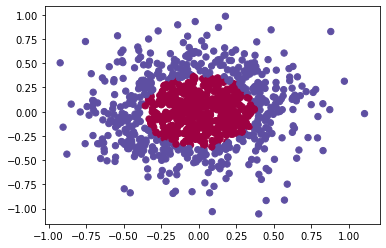

In [4]:
#la idea es que la red pueda distinguir que en el centro se ubica una clase y a los lados existe otra
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

Funciones de activación

In [5]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

función de perdida

In [6]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:            
        return np.mean((y_hat - y)**2)

Estructura de la red

se deben crear los pesos y el bias

In [7]:
def parameters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters["W"+str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1]) * 2) -1 #valores aleatorios entre -1 y 1
    parameters["b"+str(l+1)] = (np.random.rand(1, layers_dim[l+1]) * 2) -1
  return parameters

In [8]:
layers_dim = [2,4,8,1] # dos capas de entrada, dos capas ocultas de 4 y 8 newronas y 1 capa de salida
params = parameters_deep(layers_dim)

params #el peso y el bias de cada neurona

{'W1': array([[ 0.93720773, -0.88490924,  0.63134491,  0.44595426],
        [-0.98136313, -0.75829014, -0.99312169,  0.06548021]]),
 'b1': array([[-0.59864762, -0.04140682, -0.78163498, -0.84403436]]),
 'W2': array([[-0.43270708,  0.14604324,  0.07725784,  0.90603708, -0.60194931,
         -0.31576039, -0.27971086,  0.18878179],
        [ 0.63897223, -0.87038151,  0.39925813,  0.23593753, -0.8650588 ,
          0.70882765,  0.13777805,  0.91574481],
        [ 0.69840294,  0.78400487, -0.78115007,  0.07696775,  0.44984922,
         -0.33618938, -0.14781377,  0.0543386 ],
        [ 0.79549025, -0.70464314,  0.10418529, -0.05945875, -0.25126289,
          0.99989067, -0.60394489, -0.29243609]]),
 'b2': array([[-0.86380138, -0.91922865, -0.62128686,  0.22686668,  0.2704671 ,
         -0.73946613, -0.245991  , -0.56457481]]),
 'W3': array([[-0.05799981],
        [-0.93088913],
        [ 0.84188824],
        [ 0.44518044],
        [ 0.82483511],
        [-0.98947176],
        [ 0.51209583],


In [13]:
# https://glittery-jute-779.notion.site/Aplicando-backpropagation-y-gradiente-efbbe1943741428fa15324dbd99aed06

def train(x_data, lr, params, training = True):
  
  params["A0"] = x_data  # ingresamos los datos de prueba al diccionario params (los datos son de forma [1000,2])

  params["Z1"] = np.matmul(params["A0"], params["W1"]) + params["b1"] #producto punto de los datos de entrada con los pesos y el bias de la primera capa
  params["A1"] = relu(params["Z1"]) # aplicamos la funcion de activación sobre los datos anteriores. El resultado tiene una forma de [1000,4]

  
  params["Z2"] = np.matmul(params["A1"], params["W2"]) + params["b2"] 
  params["A2"] = relu(params["Z2"])

  params["Z3"] = np.matmul(params["A2"], params["W3"]) + params["b3"] 
  params["A3"] = sigmoid(params["Z3"]) #aplicamos la función sigmoide ya que esta es mejor para las prediciones

  # la forma de los datos siempre se ajustarán a la regla del producto punto, sin importar la cantidad de neuronas por cada capa que se haya selecionado anteriormente


  # params["A3"] el valor de las prediciones para cada valor

  output = params["A3"]

  if training:
    #backpropagation

    params["dZ3"] = mse(Y, output, True) * sigmoid(params["A3"], True) #obtenemos la delta de la ultima capa, por ser la ultima capa, calculamos con la función de perdida
    params["dW3"] = np.matmul(params["A2"].T, params["dZ3"])

    params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
    params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

    params["dZ1"] = np.matmul(params["dZ2"], params["W2"].T) * relu(params["A1"], True)
    params["dW1"] = np.matmul(params["A0"].T, params["dZ1"])
 
    ## Gradinet Descent:

    # actualizamos los pesos y los bias para mejorar la predicción
           
    params['W3'] = params['W3'] - params['dW3'] * lr #lr => un numero bajo para actualizar el entrenamiento 
    params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr # utilizamos la función mean para disminuir el bias a dimención 1
    
    params['W2'] = params['W2'] - params['dW2'] * lr
    params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
    
    params['W1'] = params['W1'] -params['dW1'] * lr
    params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
  return output




In [14]:
train(X,0.00001, params)


array([[0.67734895],
       [0.67734895],
       [0.67734895],
       [0.67734895],
       [0.64643789],
       [0.66296967],
       [0.6551783 ],
       [0.67734895],
       [0.67734895],
       [0.67734895],
       [0.67734895],
       [0.67734895],
       [0.63451967],
       [0.67734895],
       [0.67734895],
       [0.64761284],
       [0.67734895],
       [0.67734895],
       [0.67734895],
       [0.64159709],
       [0.67734895],
       [0.64432434],
       [0.67734895],
       [0.63963854],
       [0.67734895],
       [0.63895978],
       [0.64801915],
       [0.65783585],
       [0.64000975],
       [0.63483176],
       [0.67734895],
       [0.63611542],
       [0.65539051],
       [0.67734895],
       [0.67734895],
       [0.6388765 ],
       [0.63550574],
       [0.67734895],
       [0.67734895],
       [0.67734895],
       [0.67734895],
       [0.66825697],
       [0.70070584],
       [0.67734895],
       [0.67734895],
       [0.67734895],
       [0.67589373],
       [0.677

In [17]:
layer_dims =[2, 4, 8, 1]
params = parameters_deep(layer_dims)
errors = []
for _ in range(50000):
    output = train(X,0.00001,params)
    if _ % 25 == 0:
        # print(mse(Y,output))
        errors.append(mse(Y,output))

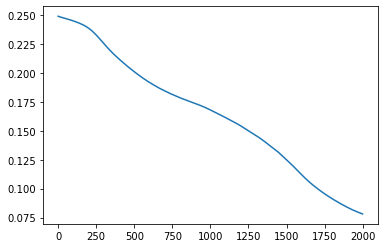

In [18]:
plt.plot(errors)

### Probando sobre datos nuevos

In [19]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

In [21]:
y = np.where(y >= 0.5, 1, 0)

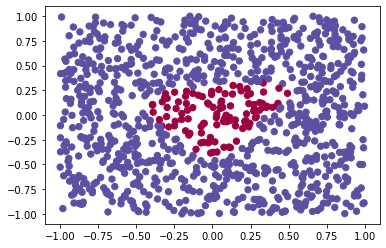

In [22]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

## Malla de visualización

In [23]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [24]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

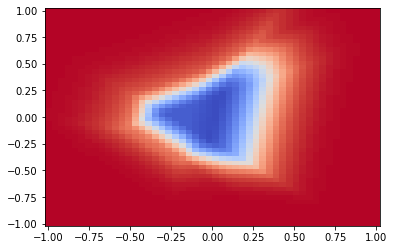

In [25]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')